# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
air_bnb = pd.read_csv('AB_NYC_2019.csv')
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [102]:
# How many neighborhood groups are available and which shows up the most?

air_bnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [103]:
# Are private rooms the most popular in manhattan?

air_bnb.groupby("neighbourhood_group").room_type.value_counts()

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

In [104]:
# Which hosts are the busiest and based on their reviews?

air_bnb.sort_values("number_of_reviews", ascending = False).head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [105]:
#Which neighorhood group has the highest average price?

air_bnb.groupby("neighbourhood_group").price.mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

Text(0.5, 1.0, 'Most expensive neighbourhoods on average')

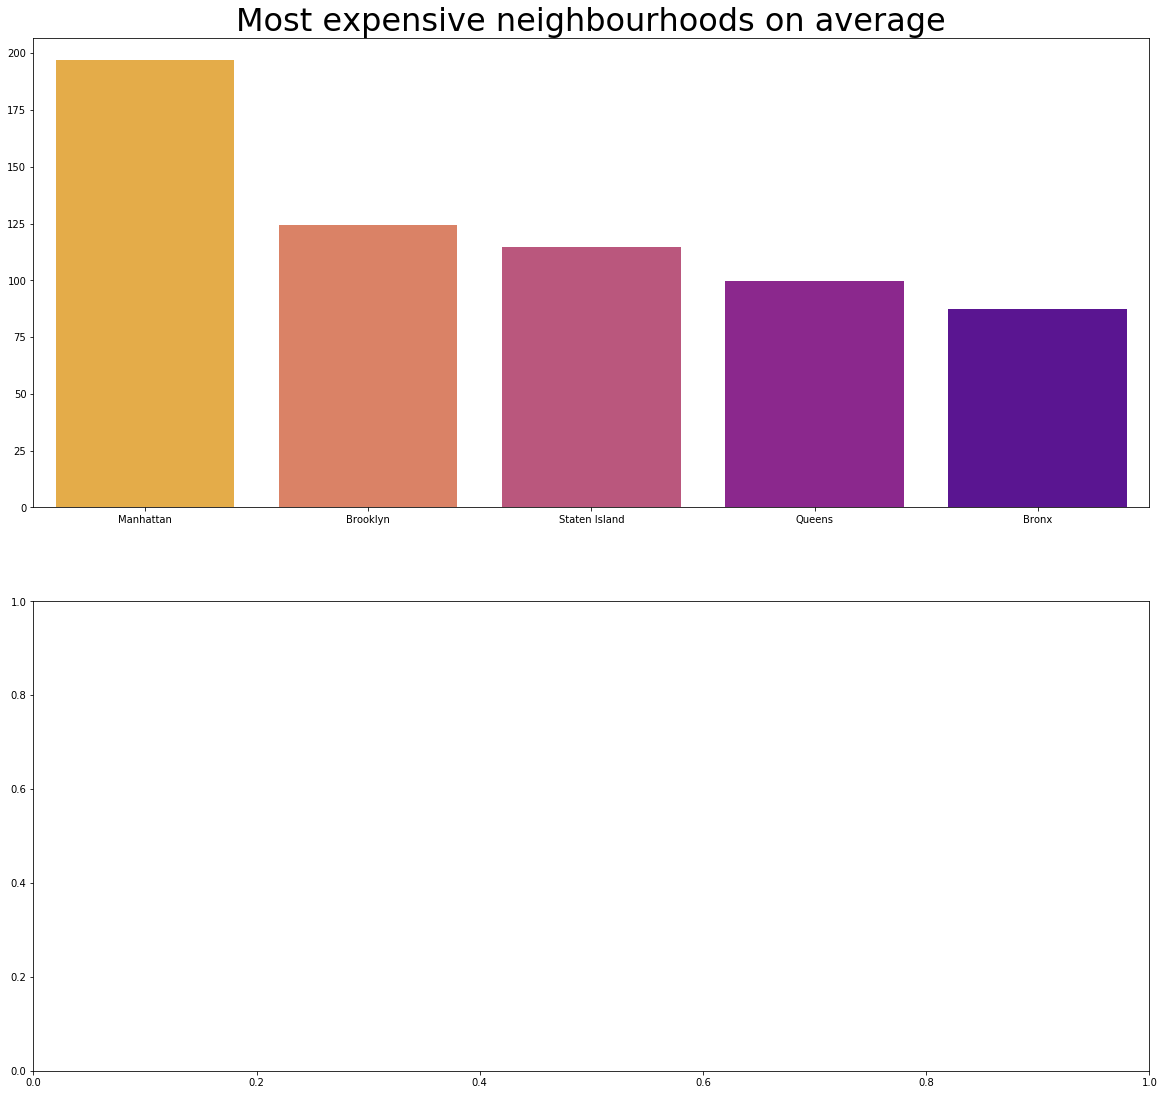

In [112]:
d = air_bnb.groupby("neighbourhood_group").price.mean().sort_values(ascending=False)

fig, ax= plt.subplots(2,1, figsize=(20,19))
sns.barplot(d.index.tolist()[:20], d.values[:20], ax=ax[0], palette=("plasma_r"))

ax[0].set_title('Most expensive neighbourhoods on average', size=32)



In [44]:
# Which neighbor hood group has the highest total price?

air_bnb.groupby("neighbourhood_group").price.sum()


neighbourhood_group
Bronx              95459
Brooklyn         2500600
Manhattan        4264527
Queens            563867
Staten Island      42825
Name: price, dtype: int64

In [48]:
#Which top 5 hosts have the highest total price?

air_bnb.sort_values("price", ascending=False).head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,NaN,12,146
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,NaN,1,364


In [66]:
# Who currently has no (zero) availability with a review count of 100 or more?

air_bnb.loc[(air_bnb['number_of_reviews'] >= 100) & (air_bnb['availability_365']==0)] 


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0
132,30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20,1.86,1,0
174,44221,Financial District Luxury Loft,193722,Coral,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20,1.06,1,0
180,45556,"Fort Greene, Brooklyn: Center Bedroom",67778,Doug,Brooklyn,Fort Greene,40.68863,-73.97691,Private room,65,2,206,2019-06-30,1.92,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29581,22705516,The Quietest Block in Manhattan :),127740507,Kathleen,Manhattan,Harlem,40.83102,-73.94181,Private room,65,2,103,2019-07-07,5.89,2,0
30461,23574142,queens get away!!,176185168,Janet,Queens,Laurelton,40.68209,-73.73662,Private room,65,1,119,2018-12-24,7.79,1,0
31250,24267706,entire sunshine of the spotless mind room,21074914,Albert,Brooklyn,Bedford-Stuyvesant,40.68234,-73.91318,Private room,49,1,102,2019-07-05,6.73,3,0
32670,25719044,COZY Room for Female Guests,40119874,Stephany,Brooklyn,Prospect-Lefferts Gardens,40.66242,-73.94417,Private room,48,1,131,2019-05-31,9.97,2,0


In [75]:
# What host has the highest total of prices and where are they located?

air_bnb.groupby("host_id").price.sum().sort_values(ascending=False)
air_bnb.loc[(air_bnb['host_id']==219517861)]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


In [69]:
# When did Danielle from Queens last receive a review?

air_bnb.loc[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')] 


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7086,5115372,Comfy Room Family Home LGA Airport NO CLEANING...,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,430,2019-07-03,13.45,5,347
16349,13151075,ASTORIA APARTMENT OUTDOOR SPACE,18051286,Danielle,Queens,Astoria,40.77221,-73.92901,Private room,50,1,0,NaN,NaN,1,0
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
21517,17222454,Sun Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76367,-73.87088,Private room,48,1,417,2019-07-07,14.36,5,338
22068,17754072,Bed in Family Home Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76389,-73.87155,Shared room,38,1,224,2019-07-06,7.96,5,80
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337
27021,21386105,Quiet & clean 1br haven with balcony near the ...,154256662,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,2018-01-02,0.05,1,180
33861,26814763,One bedroom with full bed / 1 stop from Manhattan,201647469,Danielle,Queens,Long Island City,40.74565,-73.94699,Private room,108,2,13,2019-06-20,1.74,1,333


## Further Questions

1. Which host has the most listings?

In [82]:
air_bnb.host_id.value_counts()
air_bnb.loc[(air_bnb['host_id']==219517861)]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327


2. How many listings have completely open availability?

In [86]:
air_bnb.loc[(air_bnb['availability_365']==365)] 


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48744,36415840,A BEAUTIFUL SPACE IN HEART OF WILLIAMSBURG,223715460,Simon And Julian,Brooklyn,Williamsburg,40.71091,-73.96560,Entire home/apt,499,30,0,NaN,NaN,1,365
48844,36453952,West Village Studio on quiet cobblestone street,115491896,Will,Manhattan,West Village,40.73620,-74.00827,Entire home/apt,205,1,0,NaN,NaN,1,365
48868,36473253,Heaven for you(only for guy),261338177,Diana,Brooklyn,Gravesend,40.59118,-73.97119,Shared room,25,7,0,NaN,NaN,6,365
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,NaN,3,365


3. What room_types have the highest review numbers?

In [87]:
air_bnb.groupby("room_type").number_of_reviews.sum().sort_values(ascending=False)


room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

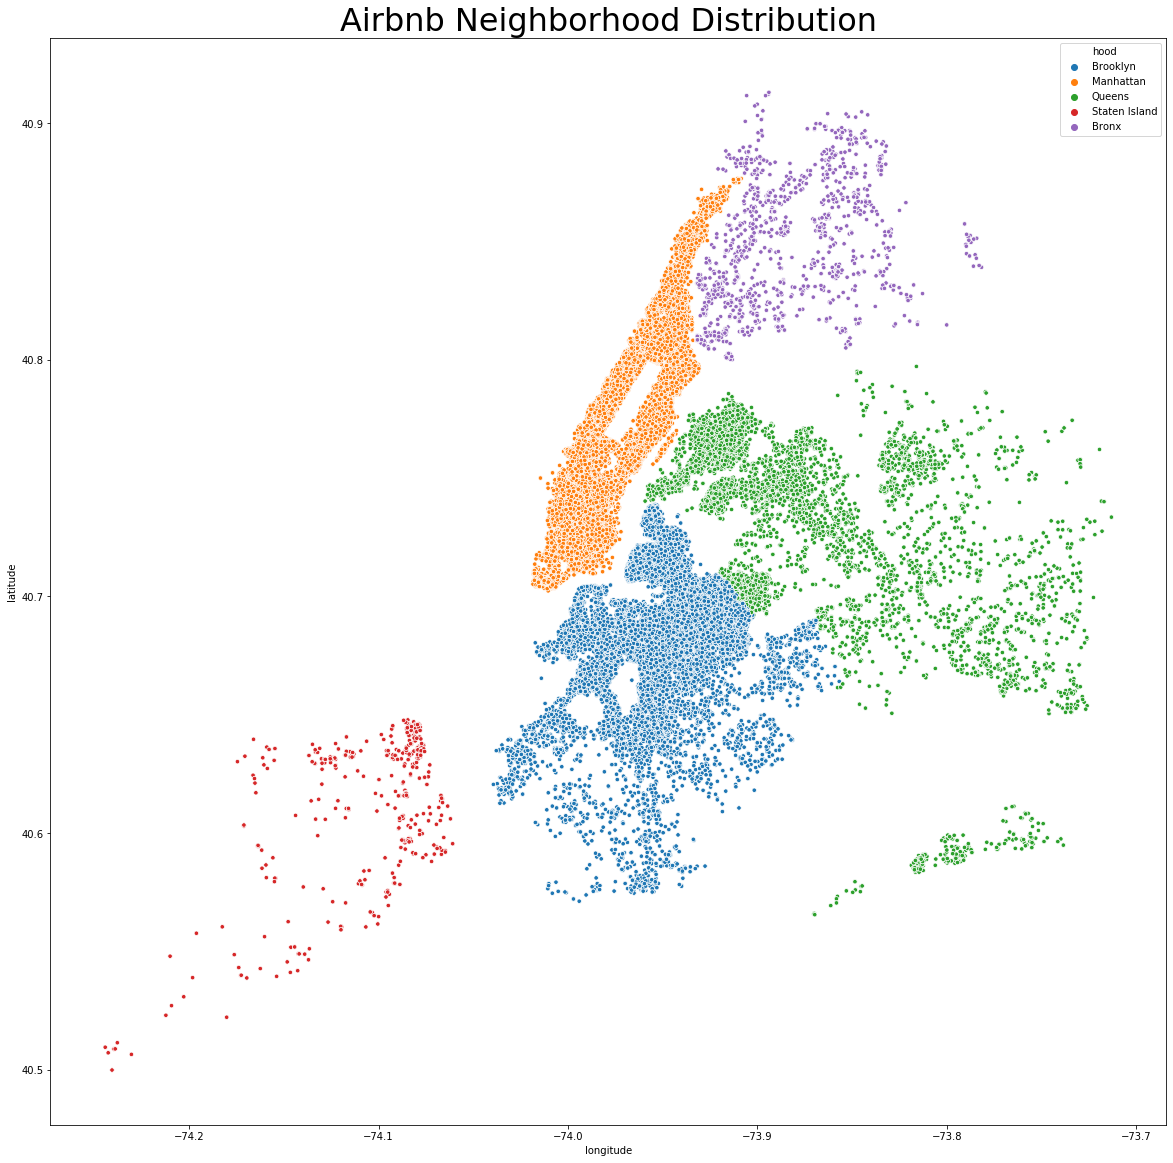

In [94]:
air_bnb.rename(columns={'neighbourhood_group':'hood'}, inplace=True)

plt.figure(figsize=(20,20))
sns.scatterplot( y='latitude',x='longitude', hue='hood',s=20, data=air_bnb)

plt.title('Airbnb Neighborhood Distribution', size=32)

plt.show()

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --